<a href="https://colab.research.google.com/github/aksalas/Car-Sales/blob/main/Car_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [2]:
# Imports

# Pandas
import pandas as pd
# Numpy
import numpy as np
# MatPlotLib
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline

# Models
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns

# Regression Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Set the default transformation output to Pandas
from sklearn import set_config
set_config(transform_output='pandas')

from IPython.core.display import clear_output

# Loading Data

## Car sales data

In [3]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQfLicudcbONFoaem30aKFT18It9CkP16yt9BcU2ogNwp1dlAS1GKFYgltolRw7jWQdMkE4wtsmqa26/pub?output=csv')

In [4]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
df.shape

(19237, 18)

1. https://www.kaggle.com/datasets/sidharth178/car-prices-dataset?select=train.csv
2. Prices for each car sold
3. target = Price
4. a row represents a car
5. Categorical
6. 18 features
7. 19237 rows
8. I dont see any forseeable challenges with this dataset as of yet.

## Adult Income data

In [6]:
df2 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSH7pYkTNbwac9XrddWv3fa79YbUtMVcU6ufjlnTomi56n1x3HTVxAurCDi-h4HfR1yKuo3trCWDBIs/pub?output=csv')

In [7]:
df2.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [8]:
df2.shape

(48842, 15)

1. https://www.kaggle.com/datasets/wenruliu/adult-income-dataset
2. Income of adults alongside some of their demographic information
3. target = Income
4. a row represents a person
5. Classification
6. 15 features
7. 48842 rows
8. I see challenges in cleaning the data

# Functions

In [9]:
# Set MatPlotLib default parameters

plt.rcParams.update({'figure.facecolor': 'white',
                          'font.weight': 'bold',
                      'patch.linewidth': 1.25,
                       'axes.facecolor': 'white',
                       'axes.edgecolor': 'black',
                       'axes.linewidth': 2,
                       'axes.titlesize': 14,
                     'axes.titleweight': 'bold',
                       'axes.labelsize': 12,
                     'axes.labelweight': 'bold',
                      'xtick.labelsize': 10,
                      'ytick.labelsize': 10,
                            'axes.grid': True,
                       'axes.grid.axis': 'y',
                           'grid.color': 'black',
                       'grid.linewidth': .5,
                           'grid.alpha': .25,
                   'scatter.edgecolors': 'black'})

# EDA

## Car Price

In [10]:
# rows and columns
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 19237 rows, and 18 columns.
The rows represent 19237 observations, and the columns represent 17 features and 1 target variable.


In [11]:
# looking at dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                19237 non-null  int64 
 1   Price             19237 non-null  int64 
 2   Levy              19237 non-null  object
 3   Manufacturer      19237 non-null  object
 4   Model             19237 non-null  object
 5   Prod. year        19237 non-null  int64 
 6   Category          19237 non-null  object
 7   Leather interior  19237 non-null  object
 8   Fuel type         19237 non-null  object
 9   Engine volume     19237 non-null  object
 10  Mileage           19237 non-null  object
 11  Cylinders         19237 non-null  int64 
 12  Gear box type     19237 non-null  object
 13  Drive wheels      19237 non-null  object
 14  Doors             19237 non-null  object
 15  Wheel             19237 non-null  object
 16  Color             19237 non-null  object
 17  Airbags     

In [12]:
# categorical data
df.describe(include='object')

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237
unique,559,65,1590,11,2,7,107,7687,4,3,3,2,16
top,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,5819,3769,1083,8736,13954,10150,3916,721,13514,12874,18332,17753,5033


In [13]:
# numeric data
df.describe(include='number')

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


## Duplicates

In [14]:
# checking to see any duplicated rows
df.duplicated().sum()

313

In [15]:
# dropping the duplicated rows rows
df = df.drop_duplicates()

In [16]:
# Checking again to see if they were properly dropped
df.duplicated().sum()

0

## Missing Values

In [17]:
df.isna().sum().sum()
# No need to deal with missing values

0

## Dropping Unnecessary columns
- the ID numer and the location of the steering wheel arent necessary to determine price of the car

In [18]:

df = df.drop(columns=['ID','Wheel'])

## Outliers

- No extreme outliers
  - There are mileage rows that are 0
  - There are cars with 16 airbags and some that are 0

In [19]:
df['Mileage'].value_counts()

0 km         714
200000 km    181
150000 km    159
160000 km    120
180000 km    117
            ... 
100563 km      1
354300 km      1
21178 km       1
110539 km      1
186923 km      1
Name: Mileage, Length: 7687, dtype: int64

In [20]:
df.describe(include="number")

,Price,Prod. year,Cylinders,Airbags
count,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,1.858744e+04,2010.914236,4.580216,6.568379
std,1.921356e+05,5.665749,1.200223,4.322323
min,1.000000e+00,1939.000000,1.000000,0.000000
25%,5.331000e+03,2009.000000,4.000000,4.000000
50%,1.317200e+04,2012.000000,4.000000,6.000000
75%,2.206300e+04,2015.000000,4.000000,12.000000
max,2.630750e+07,2020.000000,16.000000,16.000000


## Univariate Visuals

<ipython-input-21-c0bd316aefeb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


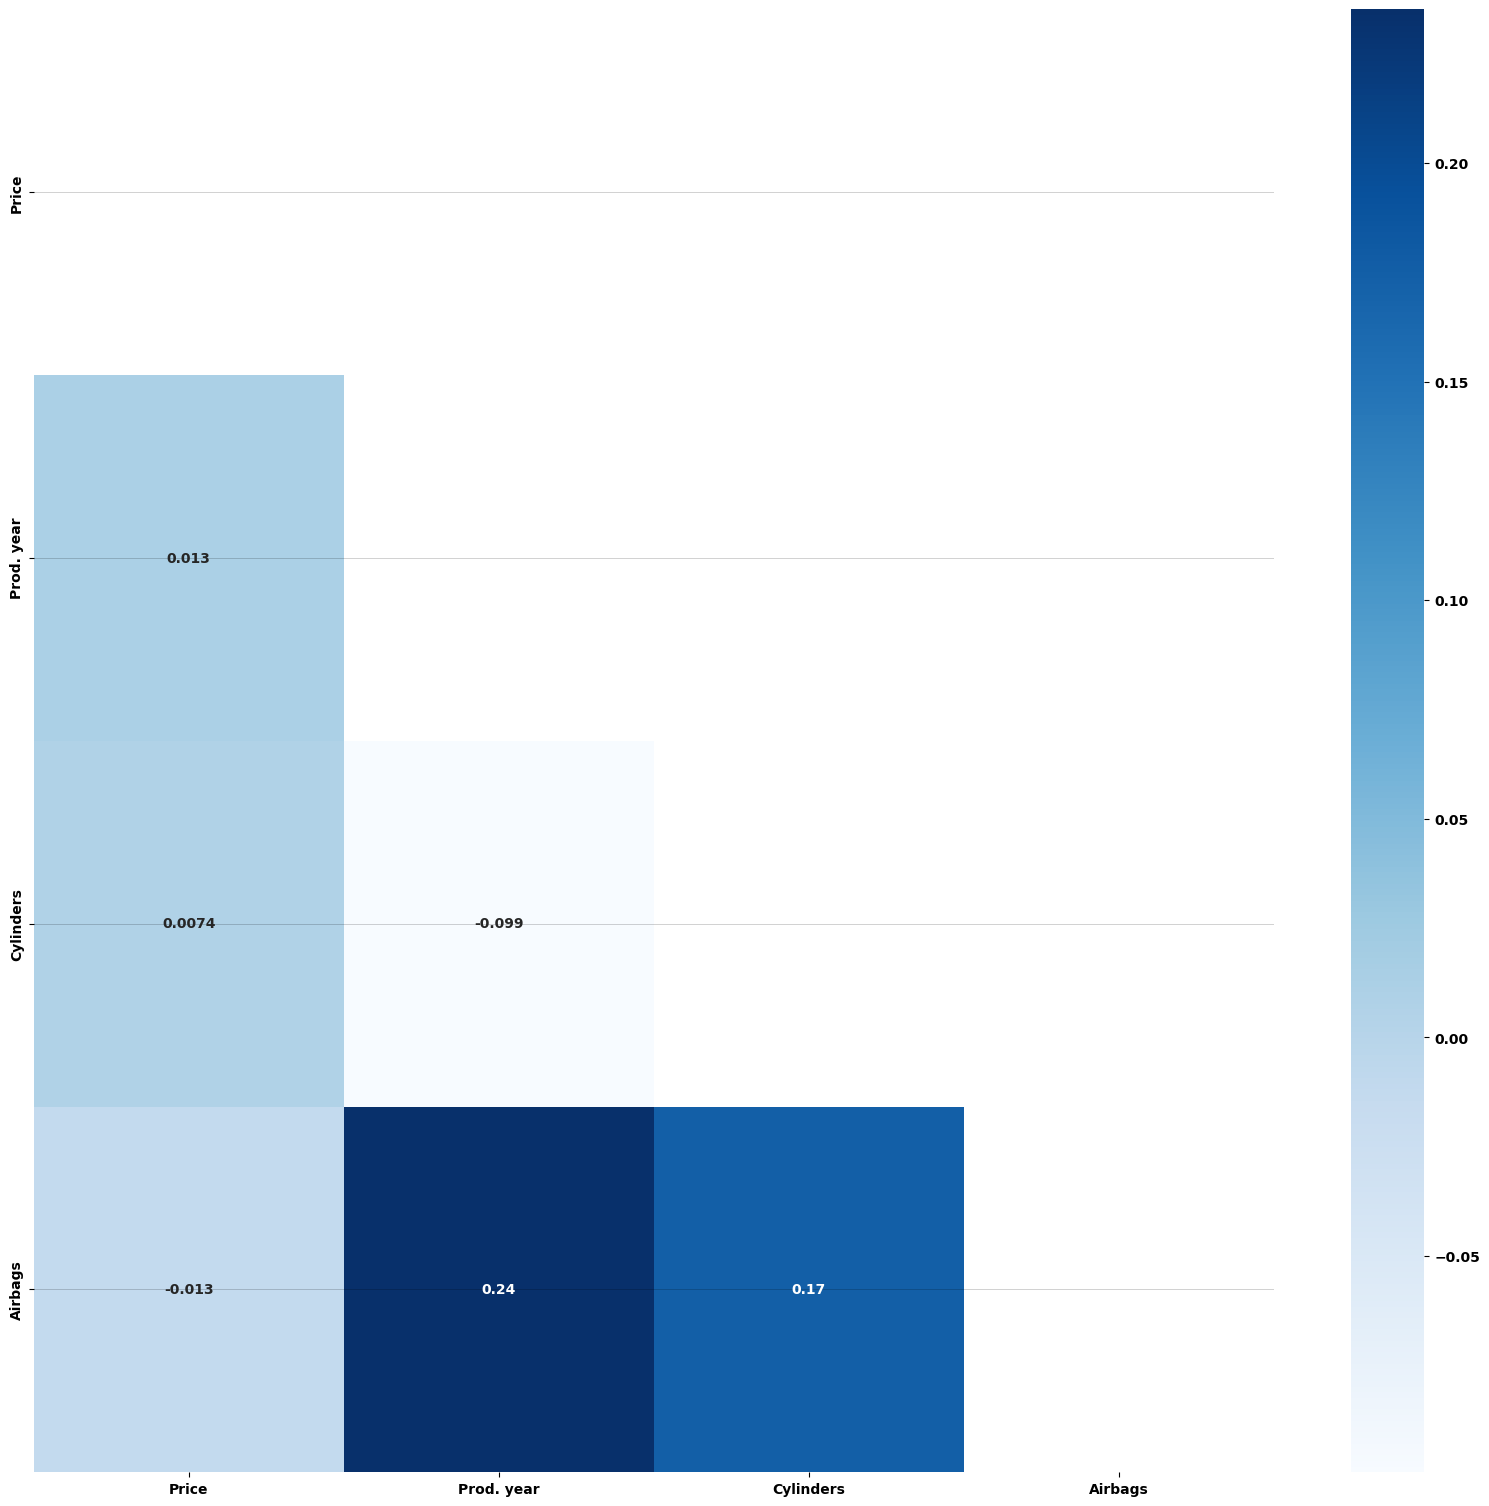

In [21]:
corr = df.corr()
mask = np.triu(np.ones_like(corr))
fig, ax = plt.subplots(figsize = (20,19))
sns.heatmap(corr, cmap= 'Blues', annot = True, mask = mask);

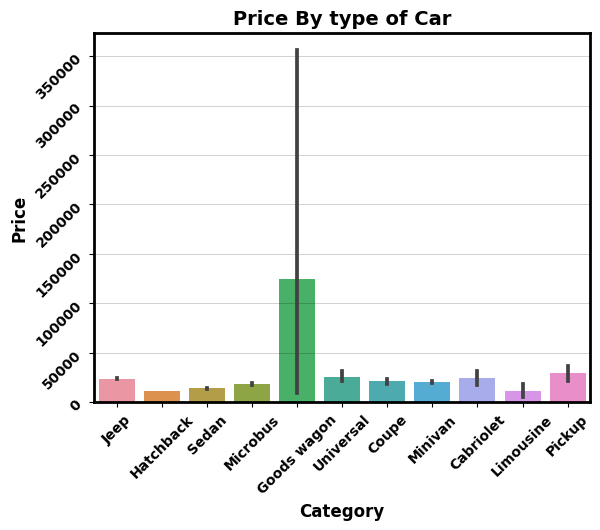

In [22]:
# code for barplot
ax = sns.barplot(data=df,
                 x= 'Category',
                 y = 'Price')

ax.tick_params(rotation = 45)

# Title
ax.set_title('Price By type of Car');

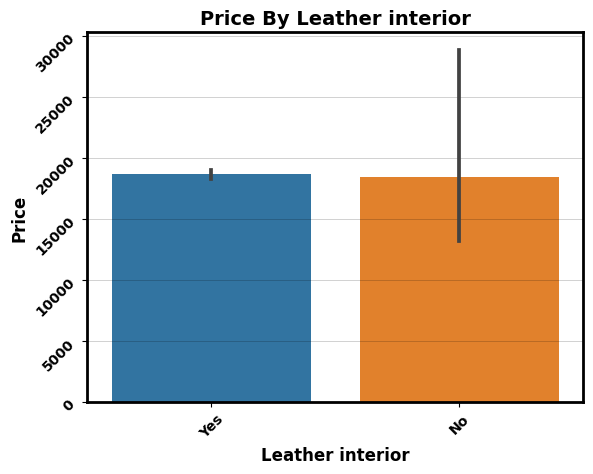

In [23]:
ax = sns.barplot(data=df,
                 x= 'Leather interior',
                 y = 'Price')

ax.tick_params(rotation = 45)

# Title
ax.set_title('Price By Leather interior');

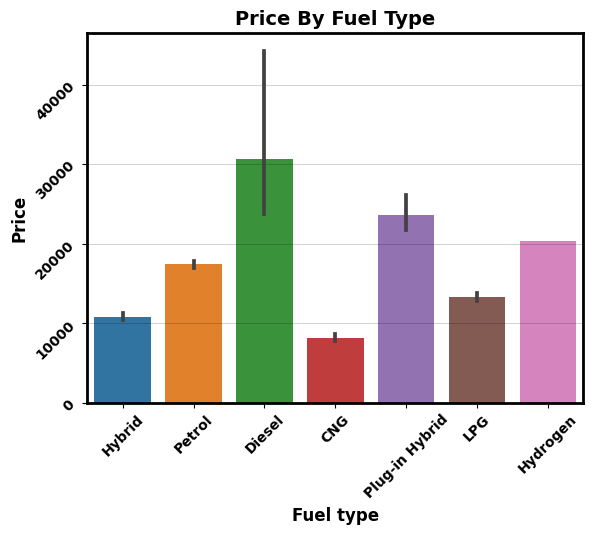

In [24]:
ax = sns.barplot(data=df,
                 x= 'Fuel type',
                 y = 'Price')

ax.tick_params(rotation = 45)

# Title
ax.set_title('Price By Fuel Type');

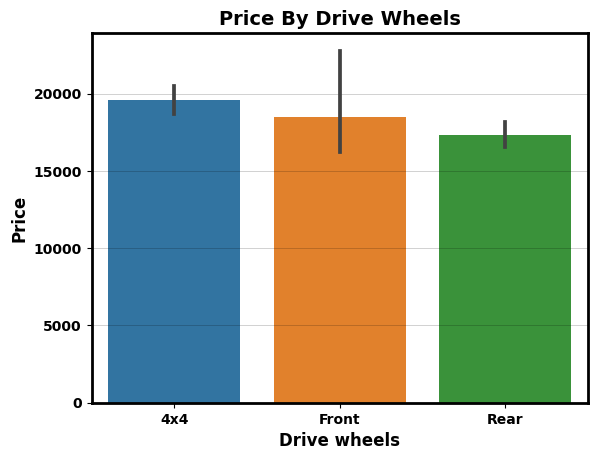

In [25]:
ax = sns.barplot(data=df,
                 x= 'Drive wheels',
                 y = 'Price')

ax.tick_params(rotation = 0)

# Title
ax.set_title('Price By Drive Wheels');

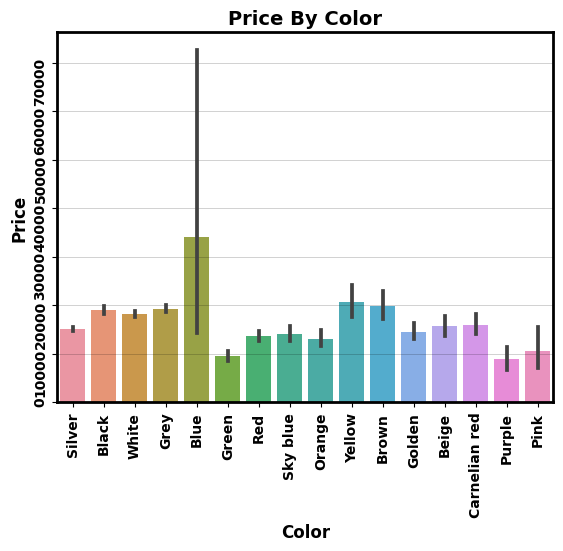

In [26]:
ax = sns.barplot(data=df,
                 x= 'Color',
                 y = 'Price')

ax.tick_params(rotation = 90)

# Title
ax.set_title('Price By Color');

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Price             18924 non-null  int64 
 1   Levy              18924 non-null  object
 2   Manufacturer      18924 non-null  object
 3   Model             18924 non-null  object
 4   Prod. year        18924 non-null  int64 
 5   Category          18924 non-null  object
 6   Leather interior  18924 non-null  object
 7   Fuel type         18924 non-null  object
 8   Engine volume     18924 non-null  object
 9   Mileage           18924 non-null  object
 10  Cylinders         18924 non-null  int64 
 11  Gear box type     18924 non-null  object
 12  Drive wheels      18924 non-null  object
 13  Doors             18924 non-null  object
 14  Color             18924 non-null  object
 15  Airbags           18924 non-null  int64 
dtypes: int64(4), object(12)
memory usage: 2.5+ MB


# Adult Income

In [28]:
df2.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [29]:
# rows and columns
df2.shape
print(f'There are {df2.shape[0]} rows, and {df2.shape[1]} columns.')
print(f'The rows represent {df2.shape[0]} observations, and the columns represent {df2.shape[1]-1} features and 1 target variable.')

There are 48842 rows, and 15 columns.
The rows represent 48842 observations, and the columns represent 14 features and 1 target variable.


In [30]:
# Looking at dtypes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Missing Values
- there are no NaN values however, there are values listed as '?" that needs to be One hot encoded

In [31]:
df2.isna().sum().sum()


0

## Dropping Unecessary Columns
- I decided to make the income to where 0 = '<50k' and 1 = >50K so that creating models will be easier if it is an integer

In [32]:
df2['income'].replace({'<=50K':0, '>50K':1}, inplace=True)

In [33]:
df2['income'] = df2['income'].astype(int)

## Outliers
- No outliers other than a person works 1 hour per week and 99 hours per week

In [34]:
df2.describe(include="number")

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


## Duplicates

In [35]:
# Checking for duplicates
df2.duplicated().sum()

52

In [36]:
# Dropping the duplicates
df2 = df2.drop_duplicates()

In [37]:
# checking to see if it dropped
df2.duplicated().sum()

0

## Univariate Visuals

<ipython-input-38-a591ba9e13ec>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr2 = df2.corr()


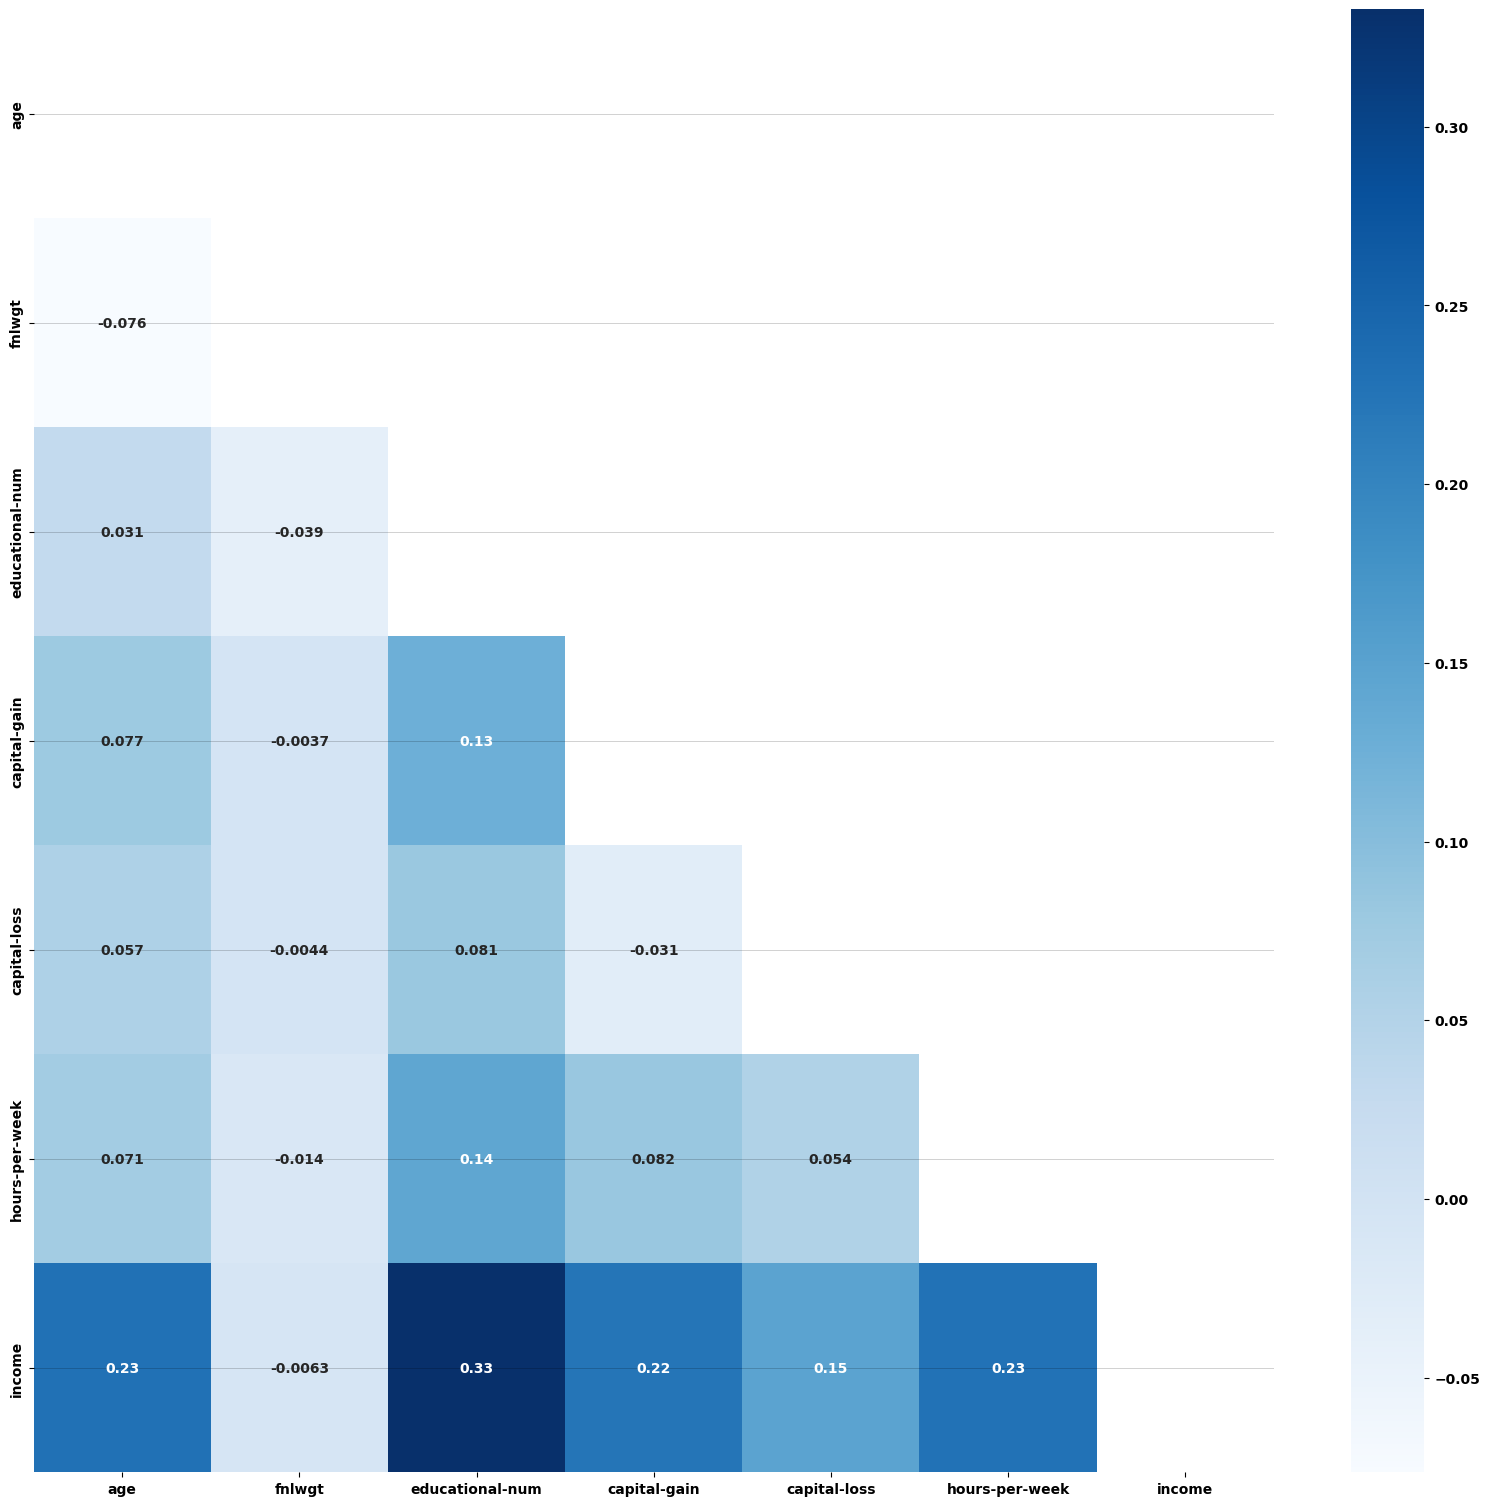

In [38]:
corr2 = df2.corr()
mask = np.triu(np.ones_like(corr2))
fig, ax = plt.subplots(figsize = (20,19))
sns.heatmap(corr2, cmap= 'Blues', annot = True, mask = mask);

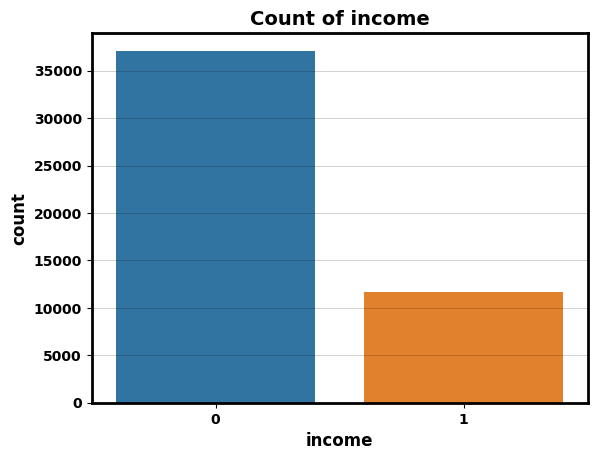

In [39]:
# label order
label_order = df2['income'].value_counts().index

# Define a MatplotLib ax (plot) object using seaborn.countplot()
ax = sns.countplot(data=df2,
                   x='income',
                   order=label_order)

# Title
ax.set_title('Count of income');

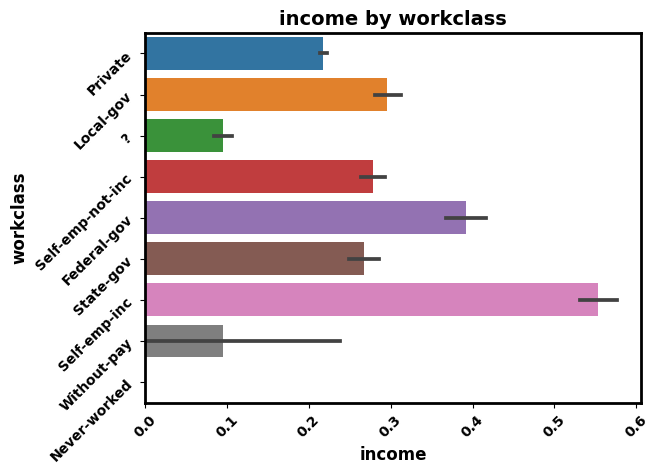

In [40]:
ax = sns.barplot(data=df2,
                 x= 'income',
                 y = 'workclass')

ax.tick_params(rotation = 45)

# Title
ax.set_title('income by workclass');

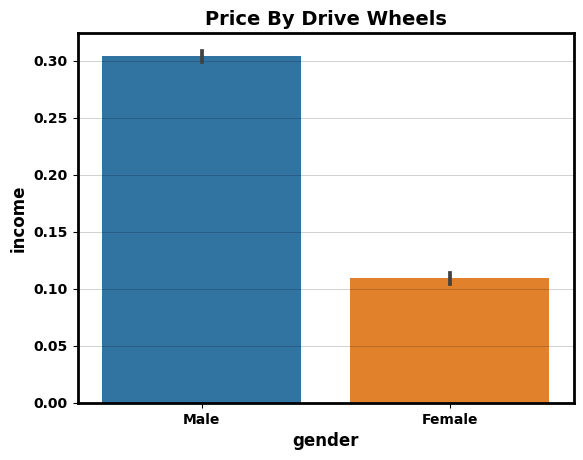

In [46]:
ax = sns.barplot(data=df2,
                 x= 'gender',
                 y = 'income')

ax.tick_params(rotation = 0)

# Title
ax.set_title('Price By Drive Wheels');

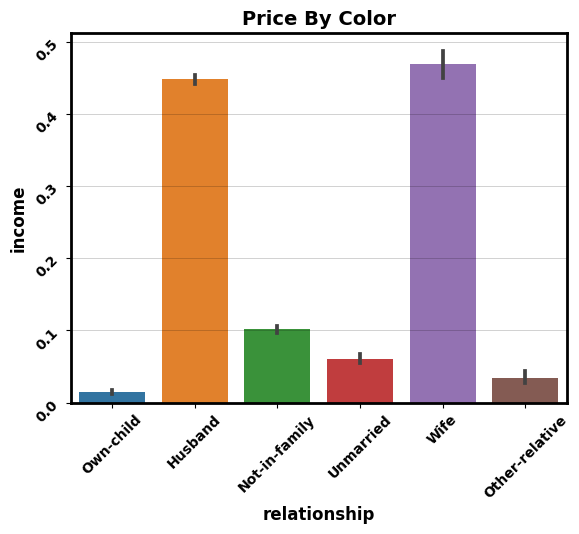

In [51]:
ax = sns.barplot(data=df2,
                 x= 'relationship',
                 y = 'income')

ax.tick_params(rotation = 45)

# Title
ax.set_title('Price By Martial status');